# CIFAR-10 uDNN Model Pre-training
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://github.com/leleonardzhang/uDNN-tf2msp/blob/main/CIFAR-10-uDNN.ipynb)

In [4]:
import tensorflow as tf
from tensorflow.keras import Sequential, layers
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import random

## Use Google Colab Pro GPU (Optional)

In [5]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


## Import CIFAR-10 Dataset

In [6]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
(trainX, trainY), (testX, testY) = cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


## Pre-processing Dataset

In [7]:
trainX = trainX / 255.0
testX = testX / 255.0

## Show an example in dataset (Optional)

ship


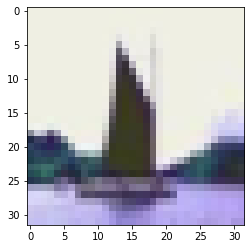

In [8]:
i = random.randint(0, trainX.shape[0])
plt.imshow(trainX[i])
print(labels[trainY[i][0]])

## Define uDNN Model

In [33]:
model = Sequential([
  layers.Conv2D(filters=16, kernel_size=3, padding="same", activation="relu", input_shape=[32,32,3]),
  layers.Conv2D(filters=16, kernel_size=3, padding="same", activation="relu"),
  layers.MaxPool2D(pool_size=2, strides=2),
  layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"),
  layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"),
  layers.MaxPool2D(pool_size=2, strides=2),
  layers.Flatten(),
  layers.Dropout(0.5),
  layers.Dense(16),
  layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 32, 32, 16)        448       
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 32, 32, 16)        2320      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 16, 16, 32)        4640      
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 2048)             

## Compile and Train Model

In [30]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['sparse_categorical_accuracy'])

In [31]:
model.fit(trainX, trainY, epochs=25, batch_size=128, validation_split=0.2)

Epoch 1/20
313/313 [==============================] - 3s 9ms/step - loss: 1.9047 - sparse_categorical_accuracy: 0.2769 - val_loss: 1.6103 - val_sparse_categorical_accuracy: 0.4199
Epoch 2/20
313/313 [==============================] - 2s 7ms/step - loss: 1.5599 - sparse_categorical_accuracy: 0.4191 - val_loss: 1.4077 - val_sparse_categorical_accuracy: 0.4912
Epoch 3/20
313/313 [==============================] - 2s 7ms/step - loss: 1.4136 - sparse_categorical_accuracy: 0.4764 - val_loss: 1.2640 - val_sparse_categorical_accuracy: 0.5448
Epoch 4/20
313/313 [==============================] - 2s 7ms/step - loss: 1.3173 - sparse_categorical_accuracy: 0.5202 - val_loss: 1.2359 - val_sparse_categorical_accuracy: 0.5528
Epoch 5/20
313/313 [==============================] - 2s 7ms/step - loss: 1.2304 - sparse_categorical_accuracy: 0.5530 - val_loss: 1.0913 - val_sparse_categorical_accuracy: 0.6006
Epoch 6/20
313/313 [==============================] - 2s 7ms/step - loss: 1.1665 - sparse_categorica

In [32]:
model.evaluate(testX, testY)

313/313 [==============================] - 1s 3ms/step - loss: 0.8259 - sparse_categorical_accuracy: 0.7176


[0.8259238004684448, 0.7175999879837036]

## Prepare to Export Model

In [16]:
! git clone https://github.com/leleonardzhang/uDNN-tf2msp.git
! pip install fxpmath
import sys
from fxpmath import Fxp
sys.path.insert(0, '/content/uDNN-tf2msp')
import encoder

fatal: destination path 'uDNN-tf2msp' already exists and is not an empty directory.


## Export Model to Header File

In [17]:
encoder.export_model(model)

## Get Sample Input and Output (Optional)

In [21]:
test_n = 1      # the nth data in test dataset
print("Fixed Point Input")
print(Fxp(testX[test_n].transpose(2,0,1), signed = True, n_word = 16, n_frac = 10).val.flatten().tolist())
print("Output Label")
print(testY[test_n])

Fixed Point Input
[943, 927, 931, 931, 931, 931, 931, 931, 931, 931, 935, 935, 935, 935, 935, 935, 935, 931, 927, 923, 931, 931, 931, 935, 931, 935, 931, 931, 931, 935, 935, 931, 955, 943, 943, 943, 943, 943, 943, 943, 943, 943, 947, 947, 947, 947, 947, 947, 951, 947, 947, 939, 939, 939, 943, 947, 947, 947, 943, 943, 943, 947, 947, 943, 951, 939, 939, 939, 939, 939, 939, 939, 939, 939, 939, 939, 939, 939, 943, 943, 947, 947, 943, 939, 911, 927, 927, 939, 939, 939, 939, 939, 939, 943, 943, 939, 955, 943, 943, 943, 943, 943, 943, 943, 939, 939, 939, 939, 939, 939, 943, 943, 935, 931, 915, 895, 746, 839, 831, 915, 947, 939, 939, 939, 939, 943, 943, 943, 951, 939, 943, 943, 943, 943, 943, 943, 939, 939, 943, 943, 939, 939, 943, 943, 947, 935, 879, 815, 654, 783, 859, 923, 951, 943, 943, 943, 943, 947, 947, 947, 959, 947, 947, 947, 947, 947, 943, 943, 939, 943, 951, 951, 939, 931, 943, 919, 835, 779, 742, 698, 662, 738, 831, 907, 947, 947, 947, 947, 947, 951, 951, 951, 915, 915, 931, 927, 9

ship


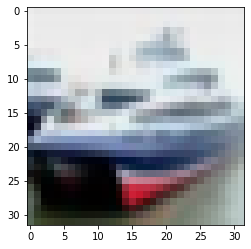

In [22]:
plt.imshow(testX[test_n])
print(labels[testY[test_n][0]])

## Next Step

1.   Download header file `neural_network_parameters.h` and copy the header file into the root directory of MSP implementation `uDNN-tf2msp-msp_impl/`.
2.   Modify the pointer `input_buffer` in `neural_network_parameters.h` and point to desired data input.
3.   Compile and run the program on MSP.
